In [52]:
# Imports
from math import sqrt
from scipy import stats
from pydataset import data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import acquire

import warnings
warnings.filterwarnings("ignore")

## Data Acquisition Exercises ##

# Exercise 1

In [102]:
# Create a pandas dataframe, df_iris, from this data.
df_iris = data('iris')

In [5]:
# print the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [6]:
# print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [7]:
# print the column names
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [8]:
# print the data type of each column
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [142]:
# print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## Exercise 2

In [10]:
# Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.
df = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [11]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails').head(100)

In [12]:
print(df_excel_sample.shape)

(100, 12)


In [13]:
# print the number of rows of your original dataframe
print(df.shape[0])

7049


In [14]:
# print the first 5 column names
print(list(df.columns[0:5]))

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']


In [15]:
# print the column names that have a data type of object
print(df.dtypes[df.dtypes == 'object'])

customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object


In [16]:
# compute the range for each of the numeric variables.
# First, identify columns with numerics
num_col = df.dtypes[(df.dtypes == 'float') | (df.dtypes == 'int')]
print(num_col)

is_senior_citizen      int64
phone_service          int64
internet_service       int64
contract_type          int64
monthly_charges      float64
total_charges        float64
dtype: object


In [251]:
# compute the range for each of the numeric variables.
num = num.describe().T

In [258]:
num['range'] = num['max'] - num['min']
num

,count,mean,std,min,25%,50%,75%,max,range
species_id,8.0,20.352404,52.392623,0.819232,1.000000,2.000000,3.000,150.0,149.180768
sepal_length,8.0,23.271425,51.247113,0.828066,4.900000,5.821667,6.775,150.0,149.171934
sepal_width,8.0,21.124150,52.086178,0.435866,2.600000,3.028667,3.575,150.0,149.564134
petal_length,8.0,21.809162,51.835213,1.000000,1.723974,4.054000,5.550,150.0,149.000000
petal_width,8.0,19.745196,52.636648,0.100000,0.646678,1.249667,1.975,150.0,149.900000


## Exercise 3

In [17]:
# get shareable link URL
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'


In [18]:
#Turn that into a CSV export URL: Replace /edit with /export; Add format=csv to the beginning of the query string.
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(csv_export_url)

https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&gid=341089357


In [88]:
# Pass it to pd.read_csv, which can take a URL.
df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [89]:
# print the number of rows and columns
print(df_google.shape)

(891, 12)


In [22]:
# print the column names
print(list(df_google.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [90]:
# print the data type of each column
print(df_google.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [142]:
# print the summary statistics for each of the numeric variables
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [93]:
# print the unique values for each of your categorical variables
df_google.select_dtypes(include='O').nunique()


Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

## Data Prep Exercises ##

In [12]:

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

import acquire

In [118]:
# Use the function defined in acquire.py to load the iris data.
iris_df = acquire.new_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [123]:
# 2.Drop the species_id and measurement_id columns.
cols_to_drop = ['species_id']
df_iris_dropped = iris_df.drop(columns=cols_to_drop)
df_iris_dropped.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [127]:
# 3) Rename the species_name column to just species.
df_iris_droppedr = df_iris_dropped.rename(columns={'species_name':'species'})
df_iris_droppedr.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [132]:
# 4) Create dummy variables of the species name.
dummy_df = pd.get_dummies(df_iris_droppedr[['species']], dummy_na=False)
dummy_df.head()

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [139]:
#5 Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.
def prep_iris(df):
    # Drop the species_id and measurement_id columns.
    cols_to_drop = ['species_id']
    df_iris_dropped = iris_df.drop(columns=cols_to_drop)
    # Rename the species_name column to just species.
    df_iris_droppedr = df_iris_dropped.rename(columns={'species_name':'species'})
    # Create dummy variables of the species name.
    dummy_df = pd.get_dummies(df_iris_droppedr[['species']], dummy_na=False)
    # Combine my dfs to form a final cleaned version
    clean_iris_df = pd.concat([df_iris_droppedr, dummy_df], axis=1)
    return clean_iris_df

In [141]:
prep_iris(acquire.new_iris_data()).head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


## Exploratory Analysis ##

In [18]:
# Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:
# Acquire, prepare & split your data.

iris_ex = acquire.new_iris_data()
iris_ex.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [53]:
# Prep by dropping redundant data = species_id
iris_ex = iris_ex.drop(columns=['species_id'])

KeyError: "['species_id'] not found in axis"

In [54]:
# Split Data

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [55]:
train, validate, test = train_validate_test_split(iris_ex, target='species_name')
train.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
89,versicolor,5.5,2.5,4.0,1.3
7,setosa,5.0,3.4,1.5,0.2
120,virginica,6.9,3.2,5.7,2.3
83,versicolor,6.0,2.7,5.1,1.6
60,versicolor,5.0,2.0,3.5,1.0


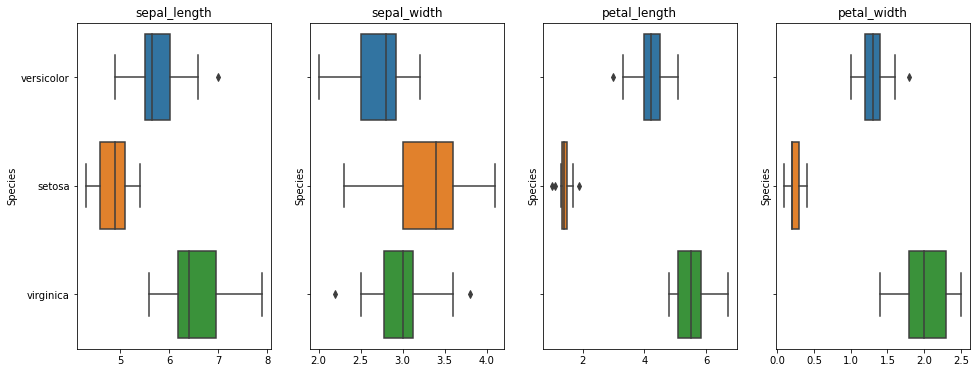

In [171]:
# 2. Univariate Stats
# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
import seaborn as sns
from sklearn.model_selection import train_test_split

cat_vars = ['species_name', 'species_id']
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, var in enumerate(quant_vars):
    sns.boxplot(var, 'species_name', data=train,
               ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Species')
    ax[i].set_title(var)

<AxesSubplot:>

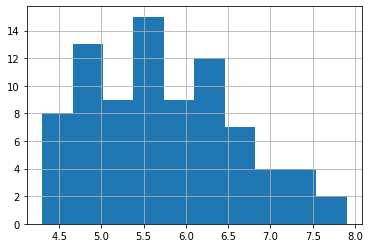

In [228]:
train.sepal_length.hist()

<AxesSubplot:>

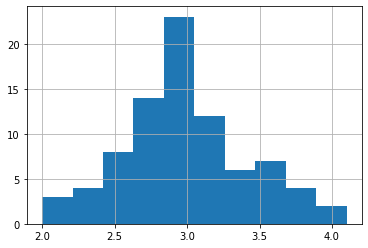

In [229]:
train.sepal_width.hist()

<AxesSubplot:>

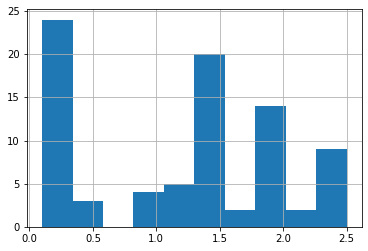

In [230]:
train.petal_width.hist()

<AxesSubplot:>

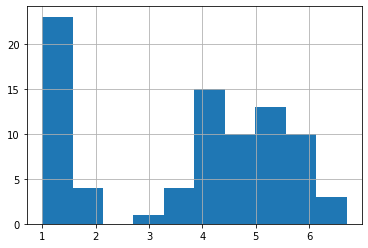

In [231]:
train.petal_length.hist()

In [79]:
For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

count    83.000000
mean      5.742169
std       0.849264
min       4.300000
25%       5.050000
50%       5.600000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64

In [80]:
train.sepal_width.describe()

count    83.000000
mean      3.002410
std       0.420214
min       2.000000
25%       2.750000
50%       3.000000
75%       3.200000
max       4.100000
Name: sepal_width, dtype: float64

In [81]:
train.petal_length.describe()

count    83.000000
mean      3.728916
std       1.753361
min       1.000000
25%       1.500000
50%       4.200000
75%       5.100000
max       6.700000
Name: petal_length, dtype: float64

In [82]:
train.petal_width.describe()

count    83.000000
mean      1.186747
std       0.762661
min       0.100000
25%       0.300000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

In [86]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
freq = train.species_name.value_counts()
freq

virginica     28
versicolor    28
setosa        27
Name: species_name, dtype: int64

Text(0.5, 1.0, 'Count by Species')

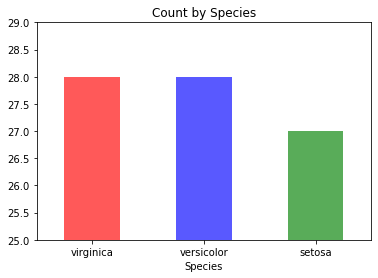

In [126]:
train.species_name.value_counts().plot(kind='bar', color=['red', 'blue', 'green'], rot=0, alpha =.65)
plt.xlabel('Species')
plt.ylim(25, 29)
plt.title('Count by Species')

In [ ]:
# Document takeaways & any actions.
 # Petal size would be a much better predictive variable vs sepal size

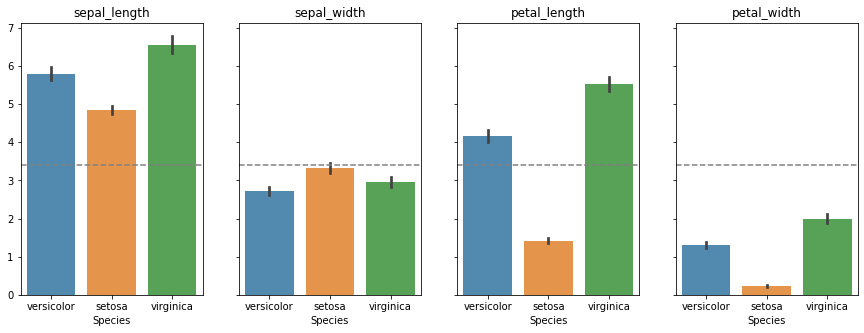

In [260]:
# Bivariate Stats
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

measure = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
allmean = measure.mean()

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), sharey=True)
for i, var in enumerate(quant_vars):
    sns.barplot('species_name', var, data=train,
               ax=ax[i], alpha=0.85)
    ax[i].set_xlabel('Species')
    ax[i].set_ylabel('')
    ax[i].set_title(var)
    ax[i].axhline(allmean, ls='--', color='grey')

<AxesSubplot:>

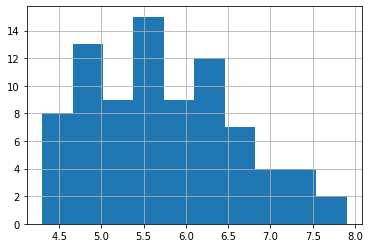

In [227]:
train.sepal_length.hist()

In [ ]:
train.sepal_length.hist()